In [1]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import math
import scipy
from scipy import stats
import pandas as pd
import numpy as np
import math
import scipy
from scipy import stats
from scipy import stats
import statsmodels.api as sm

import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt

In [2]:
data=pd.read_excel('mooc data analysis\icecream.xlsx')

In [3]:
data

,Student_Population,Sales
0,2,58
1,6,105
2,8,88
3,8,118
4,12,117
5,16,137
6,20,157
7,20,169
8,22,149
9,26,202


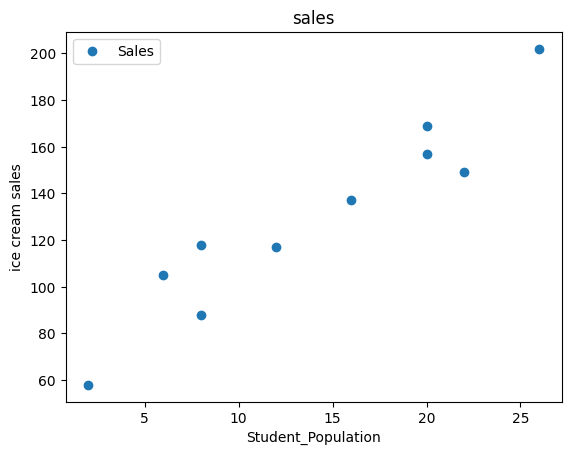

In [4]:
data.plot('Student_Population','Sales',style='o')
plt.ylabel('ice cream sales')
plt.title('sales')
plt.show()
#scatter plot

In [5]:
#reg eqn
t=data['Student_Population']
c=data['Sales']
import statsmodels.api as s
t=s.add_constant(t)
model1=sm.OLS(c,t)
result1=model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           2.55e-05
Time:                        12:23:44   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0000      9

C:\Users\prash\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [6]:
from sklearn.linear_model import LinearRegression
x=data['Student_Population'].values.reshape(-1,1)
y=data['Sales'].values.reshape(-1,1)
reg=LinearRegression()
reg.fit(x,y)

LinearRegression()

In [7]:
reg.intercept_[0],reg.coef_[0][0] #beta 0 and beta 1

(60.0, 5.0)

In [8]:

import seaborn as sns
#plot at mean of x and y
x=data['Student_Population']
y=data['Sales']
plt.figure()
sns.regplot(x,y,fit_reg=True)
plt.scatter(np.mean(x),np.mean(y),color="green")

TypeError: regplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

<Figure size 640x480 with 0 Axes>

In [9]:
#prediction interval and confidence interval
from statsmodels.stats.outliers_influence import summary_table
st,data1,ss2=summary_table(result1,alpha=0.05)
fittedvalues=data1[:,2] #3rd column
predict_mean_se=data1[:,3] #4th column
predict_mean_ci_low,predict_mean_ci_upp=data1[:,4:6].T
predict_ci_low,predict_ci_upp=data1[:,6:8].T

In [10]:
predict_mean_ci_low #CI

array([ 51.03868339,  75.2931351 ,  87.10977127,  87.10977127,
       109.56629808, 129.56629808, 147.10977127, 147.10977127,
       155.2931351 , 171.03868339])

In [11]:
predict_mean_ci_upp

array([ 88.96131661, 104.7068649 , 112.89022873, 112.89022873,
       130.43370192, 150.43370192, 172.89022873, 172.89022873,
       184.7068649 , 208.96131661])

In [12]:
predict_ci_low #PI

array([ 32.89834155,  54.8817226 ,  65.60291394,  65.60291394,
        86.446108  , 106.446108  , 125.60291394, 125.60291394,
       134.8817226 , 152.89834155])

In [13]:
predict_ci_upp

array([107.10165845, 125.1182774 , 134.39708606, 134.39708606,
       153.553892  , 173.553892  , 194.39708606, 194.39708606,
       205.1182774 , 227.10165845])

AttributeError: 'Axes' object has no attribute 'legent'

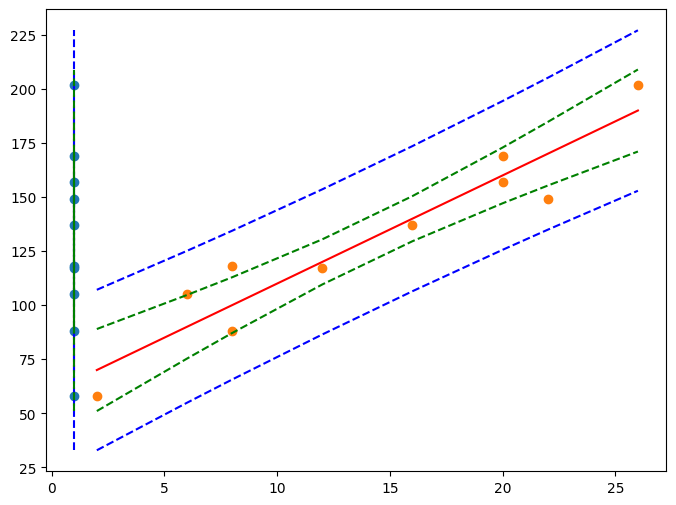

In [14]:
#plotting graph
x=s.add_constant(x)
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(x,y,'o',label="data")
ax.plot(x,fittedvalues,'r-',label='OLS')
ax.plot(x,predict_ci_low,'b--')
ax.plot(x,predict_ci_upp,'b--')
ax.plot(x,predict_mean_ci_low,'g--')
ax.plot(x,predict_mean_ci_upp,'g--')
ax.legent(loc='best')
plt.show()


In [15]:
sns.residplot(data['Student_Population'],data['Sales'],color="g")
#residuals vs x(ind. var)

TypeError: residplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

In [16]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
reg1=ols(formula="Sales~Student_Population",data=data)
fit1=reg1.fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           2.55e-05
Time:                        12:24:30   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             60.0000      9

C:\Users\prash\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [17]:

print(anova_lm(fit1))

                     df   sum_sq   mean_sq          F    PR(>F)
Student_Population  1.0  14200.0  14200.00  74.248366  0.000025
Residual            8.0   1530.0    191.25        NaN       NaN


In [18]:
anova_table=sm.stats.anova_lm(fit1,type=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Student_Population,1.0,14200.0,14200.00,74.248366,0.000025
Residual,8.0,1530.0,191.25,NaN,NaN


In [19]:
influence=fit1.get_influence()
resid_student=influence.resid_studentized_external
resid_student #array of standardized residual

array([-1.09212653,  1.26798654, -0.94196706,  1.54023214, -0.21544891,
       -0.21544891, -0.22263461,  0.68766487, -2.01063738,  1.09212653])

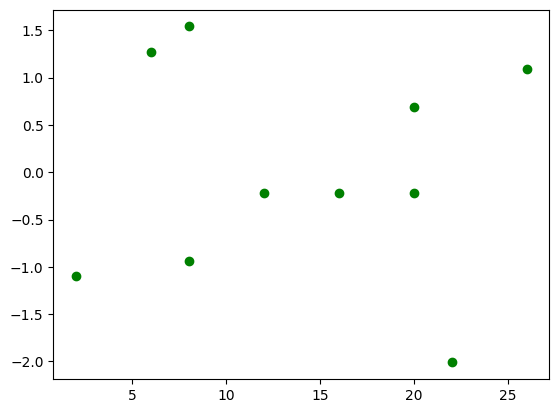

In [20]:
plt.figure()
plt.scatter(data['Student_Population'],resid_student,color="green")

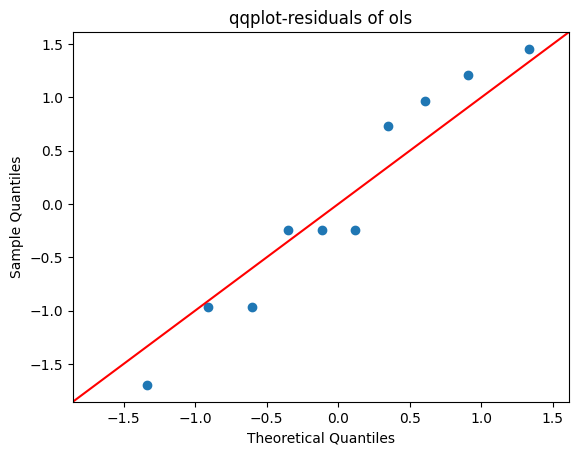

In [21]:
#check normality
res=fit1.resid
probplot=sm.ProbPlot(res,stats.norm,fit=True)
fig=probplot.qqplot(line='45')
h=plt.title('qqplot-residuals of ols')
plt.show()

In [23]:
#multiple reg
df1=pd.read_excel('E:\DA with Python\mooc data analysis\TRUCKING.xlsx')

In [24]:
df1

,Driving Assignmnet,x1,n_of_deliveries,travel_time
0,1,100,4,9.3
1,2,50,3,4.8
2,3,100,4,8.9
3,4,100,2,6.5
4,5,50,2,4.2
5,6,80,2,6.2
6,7,75,3,7.4
7,8,65,4,6.0
8,9,90,3,7.6
9,10,90,2,6.1


Text(0.5, 1.0, 'simple linear reg')

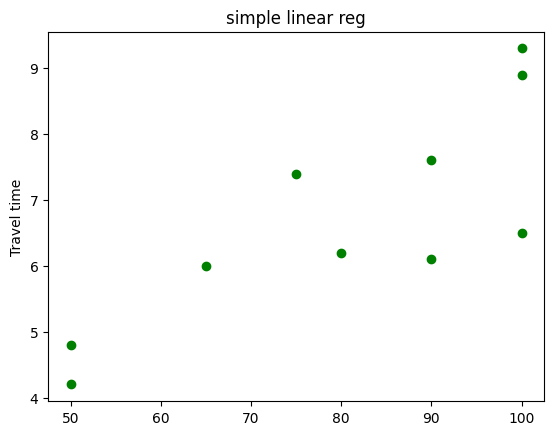

In [25]:
plt.scatter(df1['x1'],df1['travel_time'],color="green")
plt.ylabel("Travel time")
plt.title("simple linear reg")

Text(0.5, 0, 'x1 in green and x2 in red')

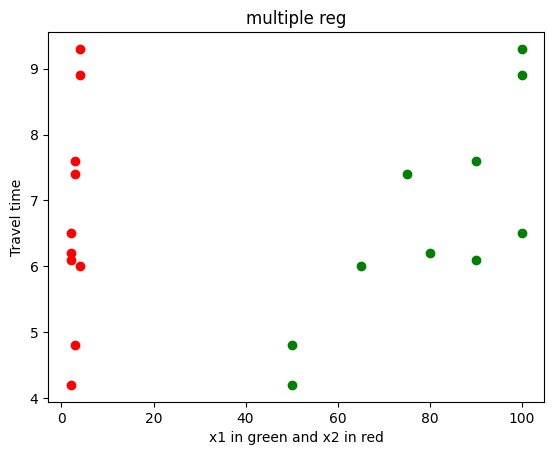

In [26]:
#plot at mean of x and y
import seaborn as sns
plt.figure()
plt.scatter(df1['x1'],df1['travel_time'],color="green")
plt.scatter(df1['n_of_deliveries'],df1['travel_time'],color="red")
plt.ylabel('Travel time')
plt.title('multiple reg')
plt.xlabel('x1 in green and x2 in red')

In [27]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
reg1=ols(formula="travel_time~x1",data=df1)
fit1=reg1.fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:            travel_time   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     15.81
Date:                Tue, 27 Aug 2024   Prob (F-statistic):            0.00408
Time:                        12:25:14   Log-Likelihood:                -13.092
No. Observations:                  10   AIC:                             30.18
Df Residuals:                       8   BIC:                             30.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2739      1.401      0.909      0.3

C:\Users\prash\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [28]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
reg1=ols(formula="travel_time~x1+n_of_deliveries",data=df1)
fit1=reg1.fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:            travel_time   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.88
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           0.000276
Time:                        12:25:17   Log-Likelihood:                -6.8398
No. Observations:                  10   AIC:                             19.68
Df Residuals:                       7   BIC:                             20.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.8687      0.952     

C:\Users\prash\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [29]:
print(anova_lm(fit1))

                  df     sum_sq    mean_sq          F    PR(>F)
x1               1.0  15.871304  15.871304  48.315660  0.000221
n_of_deliveries  1.0   5.729252   5.729252  17.441075  0.004157
Residual         7.0   2.299443   0.328492        NaN       NaN


In [30]:
anova_table=anova_lm(fit1,typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,15.871304,15.871304,48.315660,0.000221
n_of_deliveries,1.0,5.729252,5.729252,17.441075,0.004157
Residual,7.0,2.299443,0.328492,NaN,NaN


In [31]:
data = pd.DataFrame({'Black Board': {0: 4, 1: 3, 2: 2}, 
                   'Case Presentation': {0: 2, 1: 4, 2: 6}, 
                   'PPT': {0: 2, 1: 1, 2: 3}}) 
data

,Black Board,Case Presentation,PPT
0,4,2,2
1,3,4,1
2,2,6,3


In [32]:
#normal anova
datanew=pd.melt(data, id_vars=['Black Board'], value_vars=['Case Presentation','PPT'])
datanew.columns=['index','treatments','value']
print(datanew)

   index         treatments  value
0      4  Case Presentation      2
1      3  Case Presentation      4
2      2  Case Presentation      6
3      4                PPT      2
4      3                PPT      1
5      2                PPT      3


In [33]:
reg1=ols('value~C(treatments)',data=datanew)
fit1=reg1.fit()
anova_table=anova_lm(fit1,typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),1.0,6.0,6.0,2.4,0.196261
Residual,4.0,10.0,2.5,NaN,NaN


In [34]:
just_dummies=pd.get_dummies(datanew['treatments'])
just_dummies

,Case Presentation,PPT
0,True,False
1,True,False
2,True,False
3,False,True
4,False,True
5,False,True


In [35]:
step1=pd.concat([datanew,just_dummies],axis=1)
step1.drop(['treatments','PPT'],inplace=True,axis=1)
step1

,index,value,Case Presentation
0,4,2,True
1,3,4,True
2,2,6,True
3,4,2,False
4,3,1,False
5,2,3,False


In [36]:

result=smf.ols(step1['value'],sm.add_constant(step1[['Case Presentation']])).fit()
result.summary()

PatsyError: model is missing required outcome variables

In [37]:
#categorical var reg
data=pd.read_excel('E:\DA with Python\mooc data analysis\dummy.xlsx')
data

,servicecall,months_since_last_service,type_of_repair,repair_time_in_hours
0,1,2,electrical,2.9
1,2,6,mechanical,3.0
2,3,8,electrical,4.8
3,4,3,mechanical,1.8
4,5,2,electrical,2.9
5,6,7,electrical,4.9
6,7,9,mechanical,4.2
7,8,8,mechanical,4.8
8,9,4,electrical,4.4
9,10,6,electrical,4.5


Text(0.5, 1.0, 'simple linear reg')

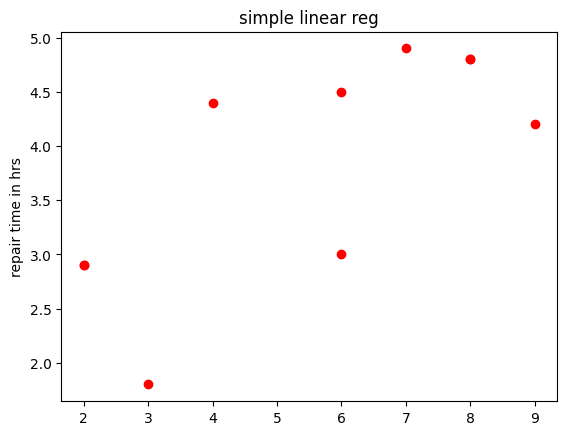

In [38]:
#plot at mean of x and y
import seaborn as sns
plt.scatter(data['months_since_last_service'],data['repair_time_in_hours'],color="red")
plt.ylabel('repair time in hrs')
plt.title('simple linear reg')

In [39]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
reg1=ols(formula="months_since_last_service~repair_time_in_hours",data=data)
fit1=reg1.fit()
print(fit1.summary())

                                OLS Regression Results                               
Dep. Variable:     months_since_last_service   R-squared:                       0.534
Model:                                   OLS   Adj. R-squared:                  0.476
Method:                        Least Squares   F-statistic:                     9.174
Date:                       Tue, 27 Aug 2024   Prob (F-statistic):             0.0163
Time:                               12:26:04   Log-Likelihood:                -19.370
No. Observations:                         10   AIC:                             42.74
Df Residuals:                              8   BIC:                             43.35
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

C:\Users\prash\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


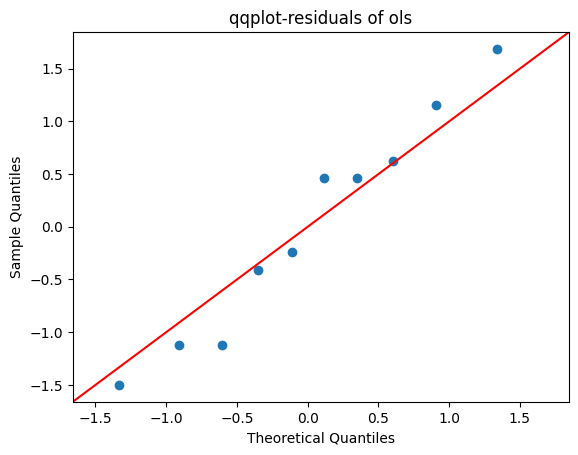

In [40]:
#check normality by q plot or residula graph
res=fit1.resid
probplot=sm.ProbPlot(res,stats.norm,fit=True)
fig=probplot.qqplot(line='45')
h=plt.title('qqplot-residuals of ols')
plt.show()

In [41]:
just_dummies=pd.get_dummies(data['type_of_repair'])
just_dummies

,electrical,mechanical
0,True,False
1,False,True
2,True,False
3,False,True
4,True,False
5,True,False
6,False,True
7,False,True
8,True,False
9,True,False


In [42]:
step1=pd.concat([data,just_dummies],axis=1)
step1.drop(['type_of_repair','mechanical'],inplace=True,axis=1)
step1

,servicecall,months_since_last_service,repair_time_in_hours,electrical
0,1,2,2.9,True
1,2,6,3.0,False
2,3,8,4.8,True
3,4,3,1.8,False
4,5,2,2.9,True
5,6,7,4.9,True
6,7,9,4.2,False
7,8,8,4.8,False
8,9,4,4.4,True
9,10,6,4.5,True


In [43]:
#reg eqn
result=smf.ols(step1['repair_time_in_hours'],s.add_constant(step1[['months_since_last_service','electrical']])).fit()
print(result.summary())

PatsyError: model is missing required outcome variables